"""
Karthikeyan Chellamuthu

8-1 (In this chapter we used sample mean to estimate • and found that the sample mean yields lower MSE…)
8-2 (Suppose that you draw a sample size with n = 10 from an exponential distribution with • = 2…)
"""


In [24]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [3]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [4]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.3907731043638826
rmse median 0.4786744706773482


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [5]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [6]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.14012431508442366
mean error unbiased 0.003188299068172368


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [7]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

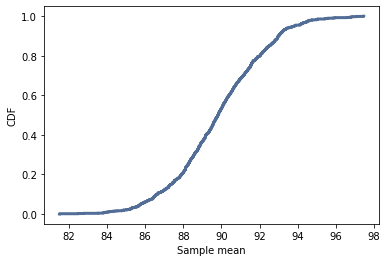

In [8]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [9]:
np.mean(xbars)

89.8574066374113

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [10]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.76187064687946, 93.7980540653661)

And the RMSE of the sample means is called the standard error.

In [11]:
stderr = RMSE(xbars, 90)
stderr

2.4442937839702523

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [12]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.248354182341179
rmse Lm 1.8741443799041257
mean error L 0.4069049784212754
mean error Lm 0.482574048611801


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [14]:
# Solution 

"""
Mean error for xbar and median as estimators of population mean.
n: sample size
m: number of iterations
"""
n = 7
m = 100000
mu = 0
sigma = 1

means = []
medians = []
for _ in range(m):
    xs = [random.gauss(mu, sigma) for i in range(n)]
    xbar = np.mean(xs)
    median = np.median(xs)
    means.append(xbar)
    medians.append(median)

err1 = [estimate-mu for estimate in means]
merr1 = np.mean(err1)
err2 = [estimate-mu for estimate in medians]
merr2 = np.mean(err2)

print('mean error xbar', merr1)
print('mean error median', merr2)

mean error xbar 0.0020445444262831456
mean error median 0.0011234919512429571


In [15]:
# Solution 

"""
From above, xbar and median yeild lower error as m increases
"""

'\nFrom above, xbar and median yeild lower error as m increases\n'

In [20]:
# Solution 

"""
RMSE for biased and unbiased estimators of population variance.
n: sample size
m: number of iterations
"""
n = 7
m = 100000
mu = 0
sigma = 1

estimates1 = []
estimates2 = []
for _ in range(m):
    xs = [random.gauss(mu, sigma) for i in range(n)]
    biased = np.var(xs)
    unbiased = np.var(xs, ddof=1)
    estimates1.append(biased)
    estimates2.append(unbiased)

"""
Computes the root mean squared error of a sequence of estimates
estimate1 and estimates2
"""
e1 = [(estimate-sigma)**2 for estimate in estimates1]
mse1 = np.mean(e1)
rmse1 = np.sqrt(mse1)

e2 = [(estimate-sigma)**2 for estimate in estimates2]
mse2 = np.mean(e2)
rmse2 = np.sqrt(mse2)

print('RMSE biased', rmse1)
print('RMSE unbiased', rmse2)


RMSE biased 0.5148267609237803
RMSE unbiased 0.576554628026546


In [22]:
# Solution observation
"""
Biased estimator yeilds lower RMSE than unbiased.
"""

'\nBiased estimator yeilds lower RMSE than unbiased.\n'

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



standard error 1.9277218839582322
confidence interval (1.2667173920131816, 3.6961345244486035)


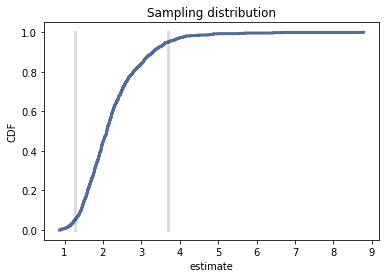

In [16]:
# Solution 
"""Sampling distribution of L as an estimator of exponential parameter.

lam: parameter of an exponential distribution
n: sample size
m: number of iterations
lam: lambda
m: iterations
"""
def SimulateSample(n):
    lam = 2           
    m = 1000      
    estimates = []    
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for j in range(m):
        xs = np.random.exponential(1/lam, n)
        lamhat = 1/np.mean(xs)
        estimates.append(lamhat)
    
    # standard error  
    e2 = [(estimate-lam**2)**2 for estimate in estimates]
    mse2 = np.mean(e2)
    stderr = np.sqrt(mse2)                          

    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='estimate',
                     ylabel='CDF',
                     title='Sampling distribution')
    
SimulateSample(10)

standard error 2.007251526391696
confidence interval (1.696821989658554, 2.352102253814975)


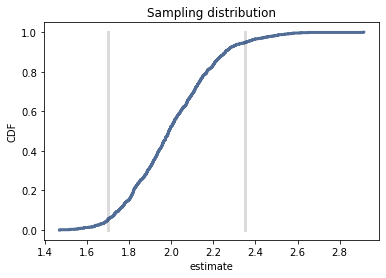

In [17]:
# Solution 
SimulateSample(100)

standard error 1.9901883864972472
confidence interval (1.8714570610585657, 2.174717936050457)


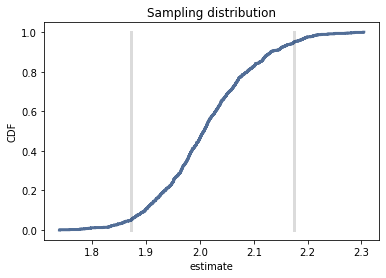

In [22]:
SimulateSample(500)

standard error 1.9984539827520442
confidence interval (1.901208143509175, 2.1104142988125725)


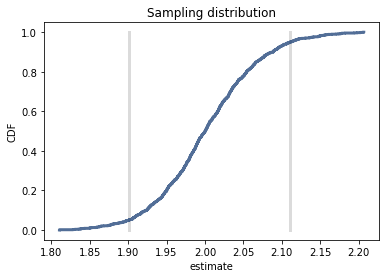

In [21]:
SimulateSample(1000)

In [23]:
"""
Standard error increases as the value of n increases
"""

'\nStandard error increases as the value of n increases\n'

**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [19]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

Experiment 4
rmse L 1.413255107898075
mean error L -0.000504


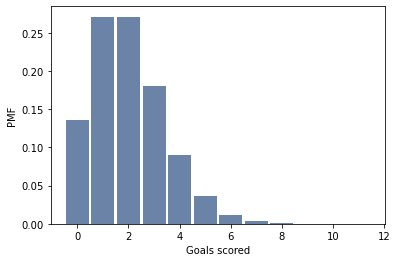

In [20]:
# Solution goes here
# Solution

# The following function simulates many games, then uses the
# number of goals scored as an estimate of the true long-term
# goal-scoring rate.

def Estimate6(lam=2, m=1000000):

    estimates = []
    for i in range(m):
        L = SimulateGame(lam)
        estimates.append(L)

    print('Experiment 4')
    print('rmse L', RMSE(estimates, lam))
    print('mean error L', MeanError(estimates, lam))
    
    pmf = thinkstats2.Pmf(estimates)
    thinkplot.Hist(pmf)
    thinkplot.Config(xlabel='Goals scored', ylabel='PMF')
    
Estimate6()